📘 analyze_prices.ipynb

🧩 1. Importations et configuration

In [4]:
# --- Importations ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import json
from datetime import datetime

# --- Configuration graphique ---
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# --- Chemin vers les données ---
DATA_DIR = "../output"
os.makedirs(DATA_DIR, exist_ok=True)
print(f"📂 Dossier de données : {DATA_DIR}")


📂 Dossier de données : ../output


📥 2. Chargement automatique des CSV

In [5]:
# Liste les fichiers CSV disponibles
files = [f for f in os.listdir(DATA_DIR) if f.endswith(".csv")]
if not files:
    raise FileNotFoundError("Aucun fichier CSV trouvé dans le dossier 'output'.")

print(f"🧾 {len(files)} fichiers trouvés :")
for f in files:
    print("  -", f)

# Charger tous les CSV et fusionner
dfs = []
for f in files:
    df = pd.read_csv(os.path.join(DATA_DIR, f))
    df["date_recolte"] = f.split("_")[-1].replace(".csv", "")
    dfs.append(df)

data = pd.concat(dfs, ignore_index=True)
print(f"✅ {len(data)} lignes chargées.")
data.head()


🧾 5 fichiers trouvés :
  - vols_paris_abidjan_2025-10-24.csv
  - vols_paris_abidjan_2025-10-25.csv
  - vols_paris_abidjan_2025-10-21.csv
  - vols_paris_abidjan_2025-10-22.csv
  - vols_paris_abidjan_2025-10-23.csv
✅ 85 lignes chargées.


,airline,price,departure_airport,arrival_airport,departure_time,arrival_time,duration,flight_number,date_recolte
0,Royal Air Maroc,861,CDG,CMN,2025-12-23 07:00,2025-12-23 10:10,700,AT 703,2025-10-24
1,Royal Air Maroc,861,CMN,ABJ,2025-12-23 14:10,2025-12-23 17:40,700,AT 535,2025-10-24
2,Air Cote D'Ivoire,894,CDG,ABJ,2025-12-23 08:00,2025-12-23 13:40,400,HF 177,2025-10-24
3,Air Senegal,928,CDG,DSS,2025-12-23 08:45,2025-12-23 13:30,670,HC 404,2025-10-24
4,Air Senegal,928,DSS,CKY,2025-12-23 14:45,2025-12-23 16:15,670,HC 215,2025-10-24


🧹 3. Nettoyage et préparation

In [6]:
# Supprimer les lignes sans prix
data = data.dropna(subset=["price"])

# Convertir les prix
data["price"] = (
    data["price"].astype(str).str.replace("[^0-9]", "", regex=True)
).astype(float)

# Convertir les dates/heures
data["departure_time"] = pd.to_datetime(data["departure_time"], errors="coerce")
data["arrival_time"] = pd.to_datetime(data["arrival_time"], errors="coerce")
data["date_recolte"] = pd.to_datetime(data["date_recolte"], errors="coerce")

# Extraire le jour du départ
data["jour_depart"] = data["departure_time"].dt.date

# Nettoyage compagnie
data["airline"] = data["airline"].fillna("Inconnue")

print(f"🧼 Données prêtes pour l’analyse : {len(data)} lignes.")
data.head()


🧼 Données prêtes pour l’analyse : 85 lignes.


,airline,price,departure_airport,arrival_airport,departure_time,arrival_time,duration,flight_number,date_recolte,jour_depart
0,Royal Air Maroc,861.0,CDG,CMN,2025-12-23 07:00:00,2025-12-23 10:10:00,700,AT 703,2025-10-24,2025-12-23
1,Royal Air Maroc,861.0,CMN,ABJ,2025-12-23 14:10:00,2025-12-23 17:40:00,700,AT 535,2025-10-24,2025-12-23
2,Air Cote D'Ivoire,894.0,CDG,ABJ,2025-12-23 08:00:00,2025-12-23 13:40:00,400,HF 177,2025-10-24,2025-12-23
3,Air Senegal,928.0,CDG,DSS,2025-12-23 08:45:00,2025-12-23 13:30:00,670,HC 404,2025-10-24,2025-12-23
4,Air Senegal,928.0,DSS,CKY,2025-12-23 14:45:00,2025-12-23 16:15:00,670,HC 215,2025-10-24,2025-12-23


📊 4. Statistiques descriptives

In [7]:
print("📈 Statistiques des prix :")
display(data["price"].describe())

print("\n✈️ Répartition des compagnies :")
display(data["airline"].value_counts())


📈 Statistiques des prix :


count      85.000000
mean      998.258824
std       154.452501
min       861.000000
25%       925.000000
50%       947.000000
75%      1040.000000
max      1614.000000
Name: price, dtype: float64


✈️ Répartition des compagnies :


airline
Royal Air Maroc      24
Brussels Airlines    22
Air Senegal          18
Air France           10
Air Cote D'Ivoire     5
Ethiopian             4
Air Algerie           2
Name: count, dtype: int64

📈 5. Distribution générale des prix

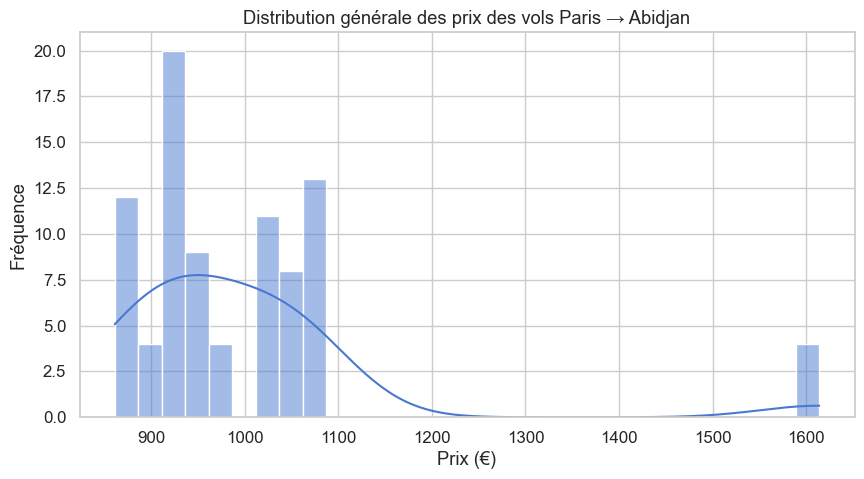

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(data["price"], bins=30, kde=True)
plt.title("Distribution générale des prix des vols Paris → Abidjan")
plt.xlabel("Prix (€)")
plt.ylabel("Fréquence")
plt.show()


📆 6. Évolution du prix moyen dans le temps (jour de collecte)

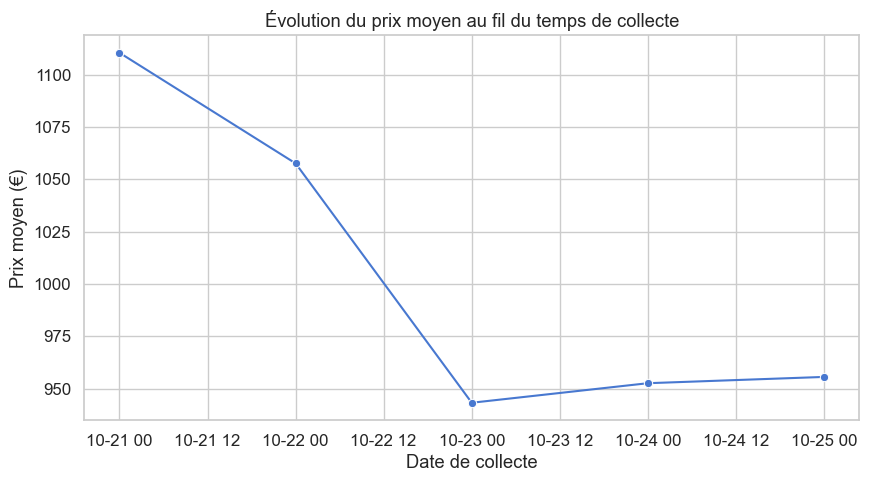

In [9]:
daily_prices = data.groupby("date_recolte")["price"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x="date_recolte", y="price", data=daily_prices, marker="o")
plt.title("Évolution du prix moyen au fil du temps de collecte")
plt.xlabel("Date de collecte")
plt.ylabel("Prix moyen (€)")
plt.show()


🏢 7. Comparaison entre compagnies aériennes

/var/folders/72/vjsfv9fs4fs1n0hxhjg1ksfr0000gn/T/ipykernel_5034/60269818.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="airline", y="price", data=data, ci=None)


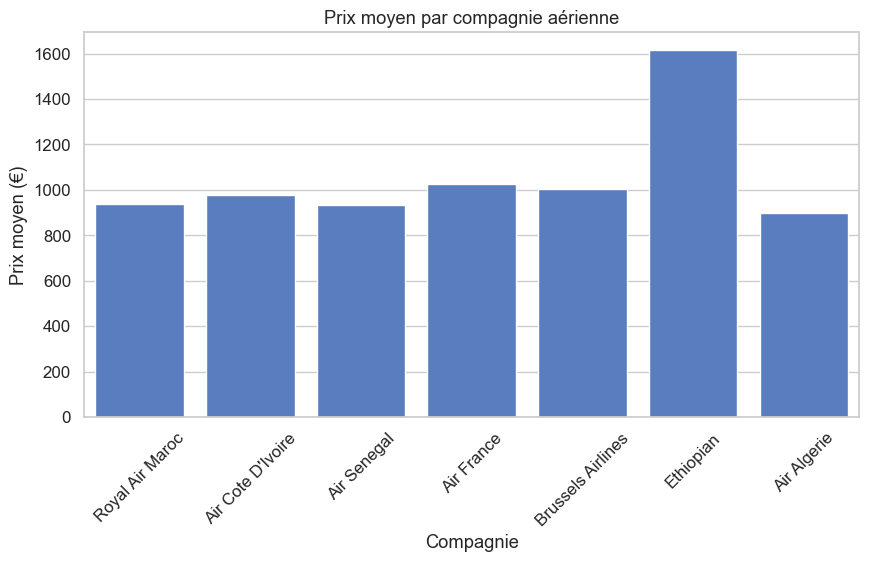

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(x="airline", y="price", data=data, ci=None)
plt.title("Prix moyen par compagnie aérienne")
plt.xlabel("Compagnie")
plt.ylabel("Prix moyen (€)")
plt.xticks(rotation=45)
plt.show()


In [ ]:
💸 8. Jours de départ les moins chers

🗓️ Jours les moins chers pour partir :


,jour_depart,price
2,2025-12-24,924.333333
1,2025-12-23,987.122449
0,2025-12-22,1057.958333


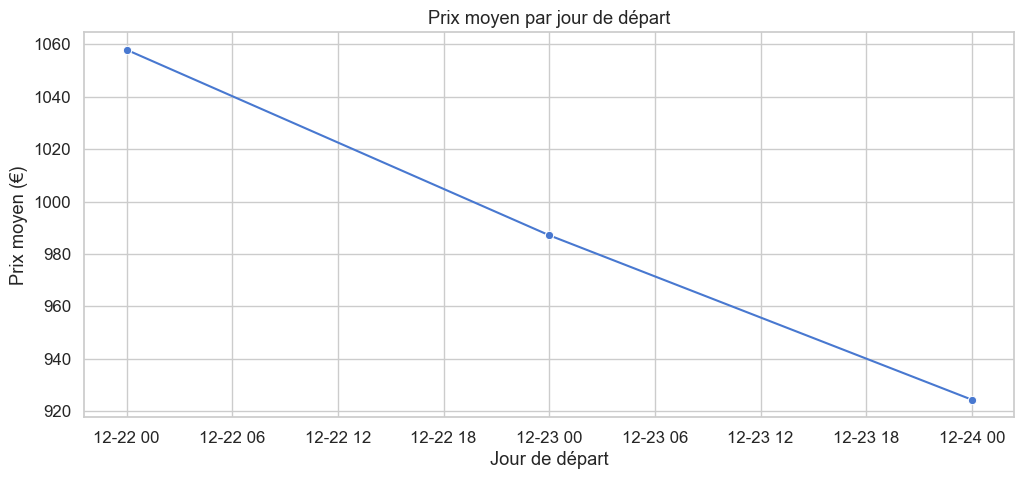

In [12]:
if data["jour_depart"].notna().any():
    cheapest_days = (
        data.groupby("jour_depart")["price"].mean()
        .reset_index()
        .sort_values("price")
    )

    print("🗓️ Jours les moins chers pour partir :")
    display(cheapest_days.head(10))

    plt.figure(figsize=(12,5))
    sns.lineplot(x="jour_depart", y="price", data=cheapest_days, marker="o")
    plt.title("Prix moyen par jour de départ")
    plt.xlabel("Jour de départ")
    plt.ylabel("Prix moyen (€)")
    plt.show()


In [11]:
q1, q3 = data["price"].quantile([0.25, 0.75])
iqr = q3 - q1
low_threshold = q1 - 1.5 * iqr

best_deals = data[data["price"] < low_threshold].sort_values("price")
print(f"💰 {len(best_deals)} offres exceptionnellement basses détectées :")
display(best_deals.head(10))


💰 0 offres exceptionnellement basses détectées :


,airline,price,departure_airport,arrival_airport,departure_time,arrival_time,duration,flight_number,date_recolte,jour_depart


📉 12. Évolution des prix par compagnie

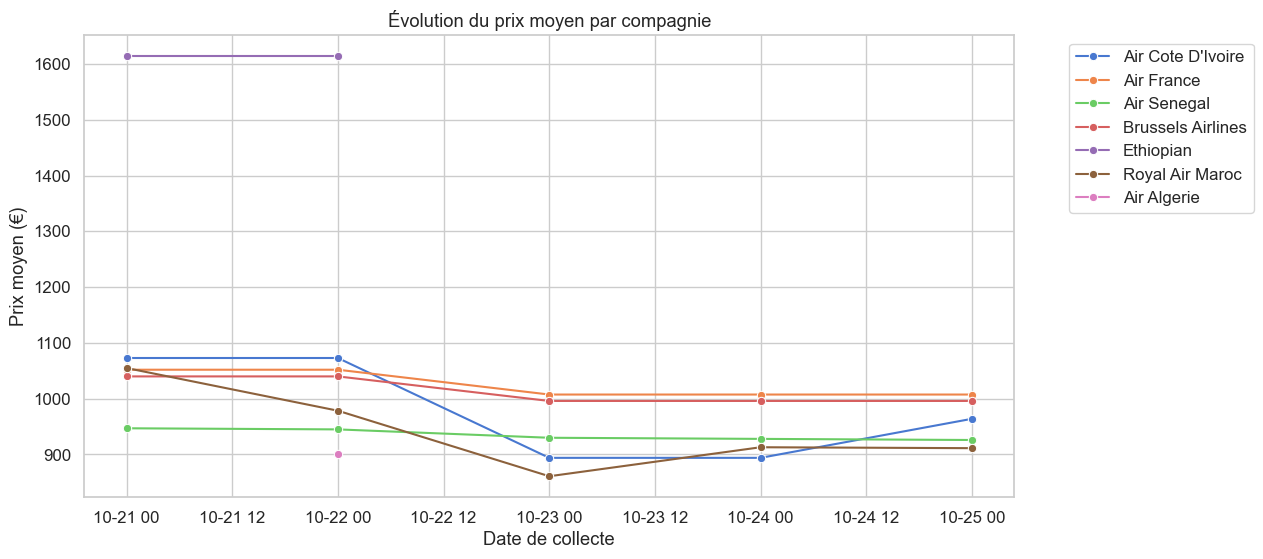

In [13]:
evolution = (
    data.groupby(["date_recolte", "airline"])["price"].mean().reset_index()
)

plt.figure(figsize=(12,6))
sns.lineplot(x="date_recolte", y="price", hue="airline", data=evolution, marker="o")
plt.title("Évolution du prix moyen par compagnie")
plt.xlabel("Date de collecte")
plt.ylabel("Prix moyen (€)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


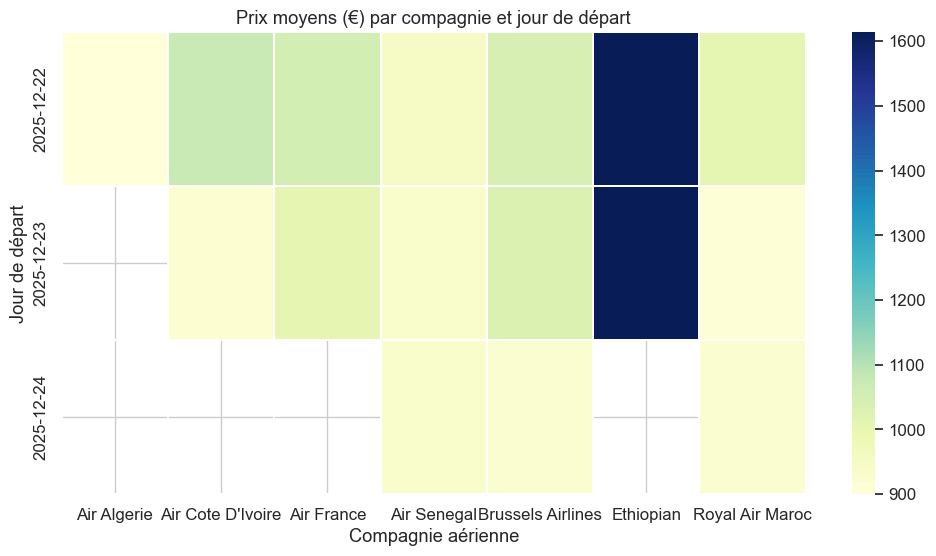

In [14]:
pivot = data.pivot_table(
    index="jour_depart", columns="airline", values="price", aggfunc="mean"
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="YlGnBu", linewidths=0.3)
plt.title("Prix moyens (€) par compagnie et jour de départ")
plt.xlabel("Compagnie aérienne")
plt.ylabel("Jour de départ")
plt.show()


In [15]:
summary = {
    "nb_vols": len(data),
    "prix_moyen": round(data["price"].mean(), 2),
    "prix_min": float(data["price"].min()),
    "prix_max": float(data["price"].max()),
    "compagnies": list(data["airline"].unique()),
    "date_maj": datetime.now().strftime("%Y-%m-%d %H:%M"),
}

report_path = "output/report_summary.json"
with open(report_path, "w", encoding="utf-8") as f:
    json.dump(summary, f, indent=2, ensure_ascii=False)

print(f"📤 Rapport exporté → {report_path}")
print(json.dumps(summary, indent=2, ensure_ascii=False))


📤 Rapport exporté → output/report_summary.json
{
  "nb_vols": 85,
  "prix_moyen": 998.26,
  "prix_min": 861.0,
  "prix_max": 1614.0,
  "compagnies": [
    "Royal Air Maroc",
    "Air Cote D'Ivoire",
    "Air Senegal",
    "Air France",
    "Brussels Airlines",
    "Ethiopian",
    "Air Algerie"
  ],
  "date_maj": "2025-10-26 00:37"
}
